In [11]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [12]:
# Load the FER2013 dataset
data = pd.read_csv('fer2013/fer2013.csv')


In [13]:
data

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training
...,...,...,...
35882,6,50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...,PrivateTest
35883,3,178 174 172 173 181 188 191 194 196 199 200 20...,PrivateTest
35884,0,17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...,PrivateTest
35885,3,30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...,PrivateTest


In [14]:
# Extract the pixel values and labels from the dataset
pixels = data['pixels'].tolist()
X = []
for sequence in pixels:
    face = [int(pixel) for pixel in sequence.split()]
    face = np.asarray(face).reshape(48, 48)
    X.append(face.astype('float32'))
X = np.asarray(X)
X = np.expand_dims(X, -1)


In [15]:
emotions = pd.get_dummies(data['emotion']).values
num_classes = emotions.shape[1]

In [16]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, emotions, test_size=0.2, random_state=42)


In [17]:
# Preprocess the data
X_train /= 255.0
X_test /= 255.0



In [18]:
# Define the CNN model architecture
model = Sequential()
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(48, 48, 1)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [19]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [20]:
# Train the model
history = model.fit(X_train, y_train, batch_size=64, epochs=50, validation_data=(X_test, y_test))


Epoch 1/50
449/449 [==============================] - 886s 2s/step - loss: 1.8265 - accuracy: 0.2484 - val_loss: 1.8046 - val_accuracy: 0.2459
Epoch 2/50
449/449 [==============================] - 845s 2s/step - loss: 1.7934 - accuracy: 0.2593 - val_loss: 1.7136 - val_accuracy: 0.3114
Epoch 3/50
449/449 [==============================] - 1130s 3s/step - loss: 1.6201 - accuracy: 0.3663 - val_loss: 1.4967 - val_accuracy: 0.4125
Epoch 4/50
449/449 [==============================] - 1502s 3s/step - loss: 1.4759 - accuracy: 0.4275 - val_loss: 1.3677 - val_accuracy: 0.4767
Epoch 5/50
449/449 [==============================] - 1007s 2s/step - loss: 1.3714 - accuracy: 0.4716 - val_loss: 1.2784 - val_accuracy: 0.5215
Epoch 6/50
449/449 [==============================] - 821s 2s/step - loss: 1.2941 - accuracy: 0.5060 - val_loss: 1.2103 - val_accuracy: 0.5332
Epoch 7/50
449/449 [==============================] - 843s 2s/step - loss: 1.2402 - accuracy: 0.5266 - val_loss: 1.1909 - val_accuracy: 0.5

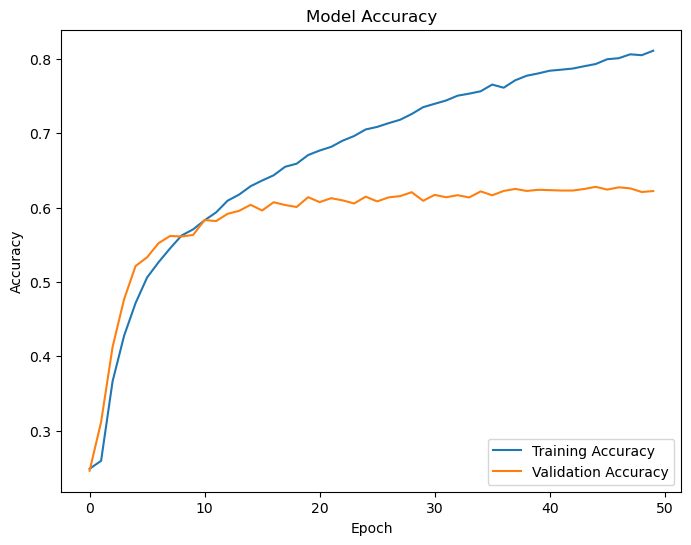

In [23]:
import matplotlib.pyplot as plt
# Plot the training and validation accuracy
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

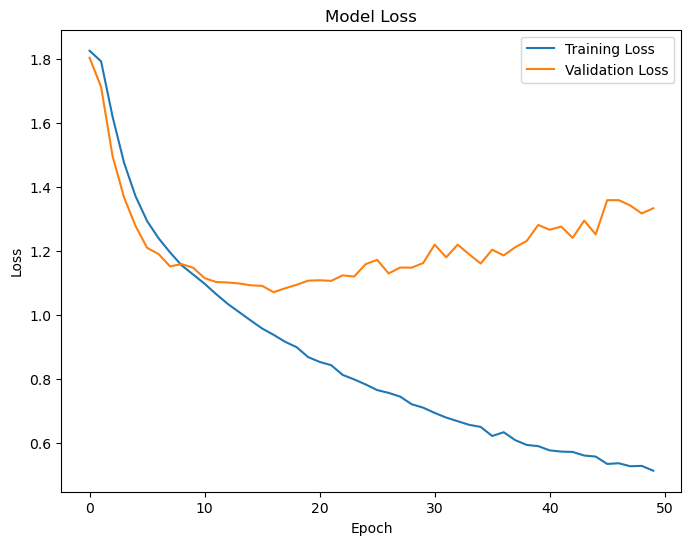

In [24]:
# Plot the training and validation loss
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

In [25]:
# Save the model
model.save('emotion_model.h5')

In [27]:
from keras.models import load_model
# Load the saved model
loaded_model = load_model('emotion_model.h5')

In [28]:
# Evaluate the model on the training and testing sets
train_loss, train_acc = loaded_model.evaluate(X_train, y_train, verbose=0)
test_loss, test_acc = loaded_model.evaluate(X_test, y_test, verbose=0)

In [29]:
print("Training Accuracy:", train_acc)
print("Testing Accuracy:", test_acc)

Training Accuracy: 0.9565293192863464
Testing Accuracy: 0.6223182082176208


In [33]:
# Count the number of occurrences for each emotion in the training and validation sets
train_emotion_counts = np.sum(y_train, axis=0)
test_emotion_counts = np.sum(y_test, axis=0)
emotions_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']


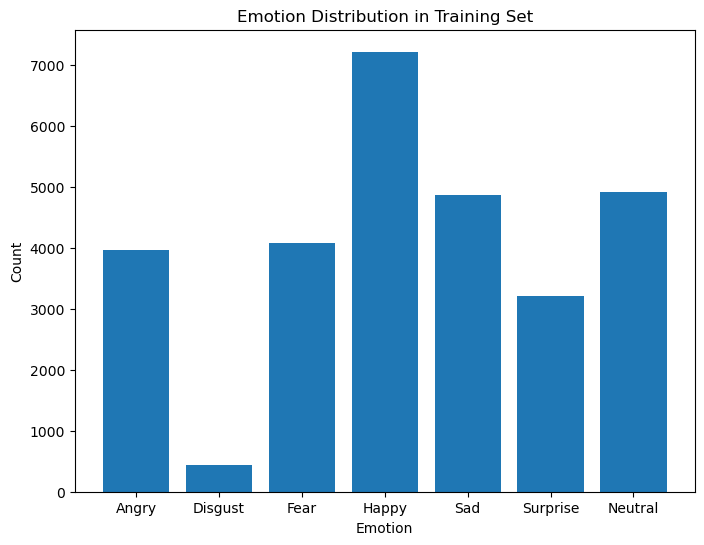

In [34]:
# Plot the distribution of emotions in the training set
plt.figure(figsize=(8, 6))
plt.bar(emotions_labels, train_emotion_counts)
plt.title('Emotion Distribution in Training Set')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.show()

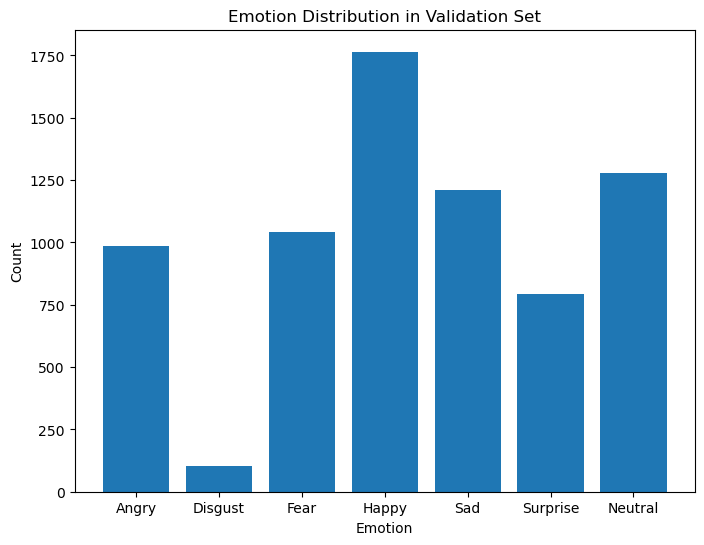

In [35]:
# Plot the distribution of emotions in the validation set
plt.figure(figsize=(8, 6))
plt.bar(emotions_labels, test_emotion_counts)
plt.title('Emotion Distribution in Validation Set')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.show()

In [37]:
def create_model() :
  model = Sequential([
    Dense(32, input_dim=8, kernel_initializer='normal', activation='relu'),
    Dense(16, input_dim=8, kernel_initializer='normal', activation='relu'),
    Dense(8, input_dim=8, kernel_initializer='normal', activation='relu'),
    Dense(1, activation='sigmoid')
  ])
  #compiling the model
  adam = Adam(learning_rate=0.01)
  model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
  return model

In [38]:
#Defining the gridsearch parameters
batch_size=[20,40,60]
epochs=[50,100,125]
#Making a dictionary of the grid paramaeters
param_grid = dict(batch_size=batch_size,epochs=epochs)
param_grid

{'batch_size': [20, 40, 60], 'epochs': [50, 100, 125]}

In [ ]:
from sklearn.model_selection import GridSearchCV, KFold
#Fitting the grid search
grid=GridSearchCV(estimator=model,param_grid=param_grid,cv=KFold(random_state=0, shuffle=True),verbose=0)

grid_results=grid.fit(X_standard,y)

# LIVE DEMO

In [ ]:
import cv2
import numpy as np
from keras.models import load_model

# Load the pre-trained model
model = load_model('emotion_model.h5')

# Define the emotions labels
emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

# Create a cascade classifier for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Start the video capture
cap = cv2.VideoCapture(0)

while True:
    # Read the current frame from the video capture
    ret, frame = cap.read()

    # Convert the frame to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detect faces in the frame
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    # Process each face in the frame
    for (x, y, w, h) in faces:
        # Extract the face region of interest (ROI)
        roi_gray = gray[y:y + h, x:x + w]
        roi_gray = cv2.resize(roi_gray, (48, 48), interpolation=cv2.INTER_AREA)

        # Normalize the ROI
        roi = roi_gray / 255.0
        roi = np.reshape(roi, (1, 48, 48, 1))

        # Predict the emotion
        predicted_emotion = model.predict(roi)[0]
        emotion_index = np.argmax(predicted_emotion)
        emotion = emotion_labels[emotion_index]

        # Draw the emotion label and bounding box on the frame
        cv2.putText(frame, emotion, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # Display the frame with emotion labels
    cv2.imshow('Facial Emotion Detection', frame)

    # Break the loop when 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the video capture and close all windows
cap.release()
cv2.destroyAllWindows()


2023-07-25 19:55:32.918795: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 39ms/step


1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 34ms/step
